# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.shape

(5000, 14)

In [6]:
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<b> droping Id and zip 

In [7]:
df.drop(['ID','ZIP Code'],axis = 1,inplace = True)

In [8]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

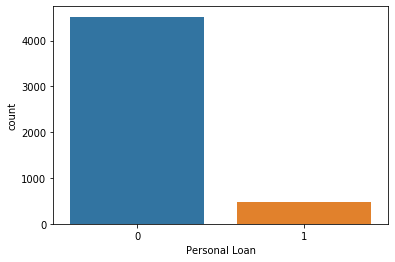

In [11]:
sns.countplot(df['Personal Loan'])
plt.show()

# Seperating Categorical and numerical data

<b> Numerical value

In [12]:
cols = set(df.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage','Personal Loan'])
cols_numeric

{'Age', 'CCAvg', 'Experience', 'Income', 'Mortgage', 'Personal Loan'}

<b> Categorical data

In [13]:
cols_cat=list(cols-cols_numeric)
cols_cat

['Family',
 'Online',
 'CD Account',
 'Education',
 'CreditCard',
 'Securities Account']

In [14]:
for x in cols_cat:
    df[x]=df[x].astype('object')

In [15]:
df_cat = df.select_dtypes(include='object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   object 
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   object 
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   object 
 9   CD Account          5000 non-null   object 
 10  Online              5000 non-null   object 
 11  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 468.9+ KB


In [16]:

df_cat.head()

,Family,Education,Securities Account,CD Account,Online,CreditCard
0,4,1,1,0,0,0
1,3,1,1,0,0,0
2,1,1,0,0,0,0
3,1,2,0,0,0,0
4,4,2,0,0,0,1


In [17]:
df_num = df.select_dtypes(include=['int64','float64']).drop("Personal Loan",axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5000 non-null   int64  
 1   Experience  5000 non-null   int64  
 2   Income      5000 non-null   int64  
 3   CCAvg       5000 non-null   float64
 4   Mortgage    5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [18]:
df_num.head(3)

,Age,Experience,Income,CCAvg,Mortgage
0,25,1,49,1.6,0
1,45,19,34,1.5,0
2,39,15,11,1.0,0


In [19]:
df_cat.head(3)

,Family,Education,Securities Account,CD Account,Online,CreditCard
0,4,1,1,0,0,0
1,3,1,1,0,0,0
2,1,1,0,0,0,0


# Outliers

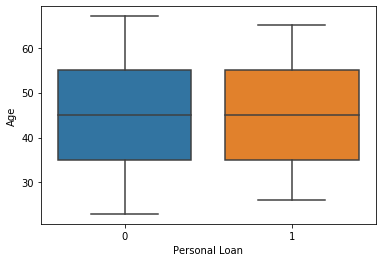

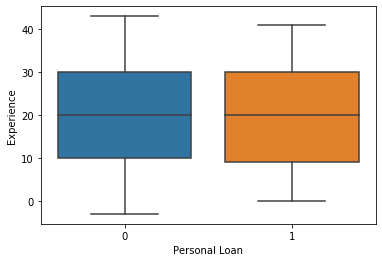

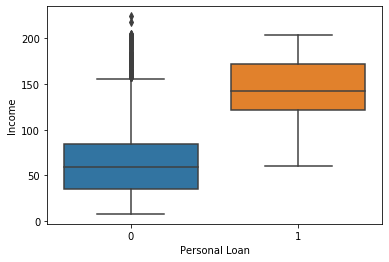

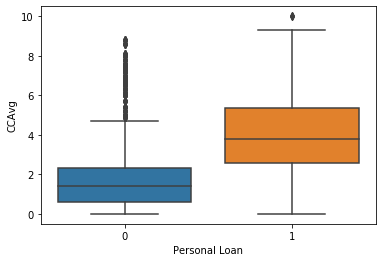

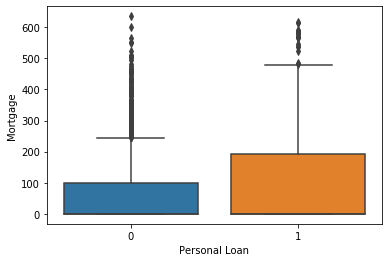

In [20]:
for col in df_num:
    plt.figure()
    sns.boxplot(df["Personal Loan"],df_num[col])
    plt.show()

In [21]:
df_num[df_num['Mortgage'] == 0]['Mortgage'].count()

3462

In [22]:
df_num.corr()

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000


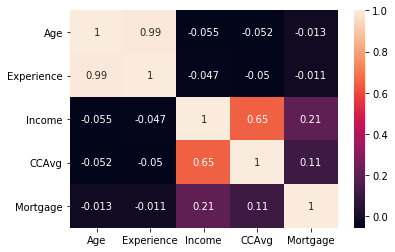

In [23]:
sns.heatmap(df_num.corr(),annot = True)
plt.show()

# training and testing dataset

In [24]:
df_clean = pd.concat([df_cat,df_num],axis=1)
df_clean

,Family,Education,Securities Account,CD Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage
0,4,1,1,0,0,0,25,1,49,1.6,0
1,3,1,1,0,0,0,45,19,34,1.5,0
2,1,1,0,0,0,0,39,15,11,1.0,0
3,1,2,0,0,0,0,35,9,100,2.7,0
4,4,2,0,0,0,1,35,8,45,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,0,0,1,0,29,3,40,1.9,0
4996,4,1,0,0,1,0,30,4,15,0.4,85
4997,2,3,0,0,0,0,63,39,24,0.3,0
4998,3,2,0,0,1,0,65,40,49,0.5,0


In [25]:

X = df_clean
y = df["Personal Loan"]

In [26]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [28]:
X_train.columns

Index(['Family', 'Education', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'],
      dtype='object')

In [29]:
def create_model(model,X_train=X_train,y_train=y_train):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

# logistic regression

In [30]:
lr = LogisticRegression()


In [31]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.82      0.53      0.64       149

    accuracy                           0.94      1500
   macro avg       0.89      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# decision tree

In [32]:
dt = DecisionTreeClassifier()
create_model(dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.89      0.88      0.88       149

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# random forest

In [33]:
rt =RandomForestClassifier(n_estimators=200,max_depth=10)
create_model(rt)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.97      0.84      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# gradient boosting

In [34]:

gb = GradientBoostingClassifier(n_estimators=100,max_depth=25)
create_model(gb)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=25,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

<b> Accuracy:
    
    logistic regression : 0.94
    
    decision tree : 0.98
    
    random forest : 0.98
    
    gradient boosting : 0.98
    